In [4]:
!pip install tsai --quiet
!pip install scikit-learn pandas --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hvac_with_weather.csv to hvac_with_weather.csv


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("hvac_with_weather.csv")

# Convert timestamp to pandas datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], dayfirst=True)
df = df.sort_values("timestamp").reset_index(drop=True)

# Set timestamp as index
df.set_index("timestamp", inplace=True)

print(df.shape)
df.head()


(23733, 49)


,hour,day_of_week,zone_id,zone_type,zone_capacity,zone_area_sq_m,zone_orientation,zone_function,occupancy_count,occupancy_pct,...,cos_day_of_week,solar_presence,external_temperature,relative_humidity,solar_radiation,wind_speed,dew_point,weather_condition,temperature_humidity_index,merge_key_weather
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-06-01 00:00:00,0,5,Baggage,Arrival,1800,1400,W,Baggage,0,0.0,...,-0.222521,False,20.8,70.8,0.0,2.18,15.0,Sunny,19.8,2024-06-01 00:00
2024-06-01 01:00:00,1,5,Gates,Departure,2200,1600,W,Gates,296,13.5,...,-0.222521,False,21.9,67.8,0.0,2.71,15.5,Sunny,20.6,2024-06-01 01:00
2024-06-01 01:00:00,1,5,Lounges,Departure,600,700,S,Lounges,81,13.5,...,-0.222521,False,21.9,67.8,0.0,2.71,15.5,Sunny,20.6,2024-06-01 01:00
2024-06-01 01:00:00,1,5,F&B_Dep,Departure,900,850,E,F&B,87,9.7,...,-0.222521,False,21.9,67.8,0.0,2.71,15.5,Sunny,20.6,2024-06-01 01:00
2024-06-01 01:00:00,1,5,Retail_Arr,Arrival,700,600,E,Retail,0,0.0,...,-0.222521,False,21.9,67.8,0.0,2.71,15.5,Sunny,20.6,2024-06-01 01:00


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Identify columns containing strings (non-numeric)
categorical_cols = [
    "zone_id",              # e.g., 'Baggage'
    "zone_type",            # e.g., 'Arrival'
    "zone_function",        # e.g., 'Baggage'
    "weather_condition",    # e.g., 'Sunny'
    "zone_orientation",     # e.g., 'W', 'E'
    "solar_presence",       # TRUE/FALSE
    "is_weekend",           # TRUE/FALSE
    "occupancy_level",      # Low/Medium/High
    "zoning_mode",          # Energy_Saving, Normal, ...
    "merge_key_weather"     # e.g., '2024-06-01 00:00'
]

# Step 2: Label encode each categorical column
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Ensure string
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 3: Define input and target columns
targets = ["predicted_cooling_load_kWh", "optimized_cooling_load_kWh", "actual_cooling_load_kWh"]
input_features = [col for col in df.columns if col not in targets]

# Step 4: Drop rows where target columns are missing (if any)
df = df.dropna(subset=targets)

# Step 5: Standard scale the input features
scaler = StandardScaler()
df[input_features] = scaler.fit_transform(df[input_features])

In [ ]:
#This code already present in above cell

# Define target columns
targets = ["predicted_cooling_load_kWh", "optimized_cooling_load_kWh", "actual_cooling_load_kWh"]

# Input features = all columns except targets
input_features = [col for col in df.columns if col not in targets]

# Drop rows with missing target values
df = df.dropna(subset=targets)

# Normalize input features (optional but recommended)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[input_features] = scaler.fit_transform(df[input_features])


In [ ]:
import numpy as np

context_window = 48
forecast_horizon = 1

X = df[input_features].values.astype(np.float32)
y = df[targets].values.astype(np.float32)

X_seq = []
y_seq = []

# Loop safely to extract consistent sequences
for i in range(len(df) - context_window - forecast_horizon):
    x_window = X[i : i + context_window].T             # Shape: (features, time_window)
    y_window = y[i + context_window]                   # Shape: (num_targets,)

    X_seq.append(x_window)
    y_seq.append(y_window)

X_seq = np.stack(X_seq)                                # Shape: (samples, features, time)
y_seq = np.stack(y_seq)                                # Shape: (samples, targets)

print(f"X_seq shape: {X_seq.shape}")   # (N, C, T)
print(f"y_seq shape: {y_seq.shape}")   # (N, target_dim)

X_seq shape: (23684, 46, 48)
y_seq shape: (23684, 3)


In [ ]:
context_window = 48
forecast_horizon = 1

import numpy as np

X = df[input_features].values.astype(np.float32)
y = df[targets].values.astype(np.float32)

n_features = X.shape[1]
n_targets = y.shape[1]

bad_windows = []

for i in range(len(df) - context_window - forecast_horizon):
    x_window = X[i: i + context_window].T
    y_window = y[i + context_window]
    if x_window.shape != (n_features, context_window):
        print(f"Index {i}: x_window shape {x_window.shape} mismatch (expected ({n_features}, {context_window}))")
        bad_windows.append((i, 'X', x_window.shape))
    elif y_window.shape != (n_targets,):
        print(f"Index {i}: y_window shape {y_window.shape} mismatch (expected ({n_targets},))")
        bad_windows.append((i, 'y', y_window.shape))

if not bad_windows:
    print("✅ All windows have correct shape!")
else:
    print(f"⚠️ Found {len(bad_windows)} problematic windows. Examples:", bad_windows[:5])

✅ All windows have correct shape!


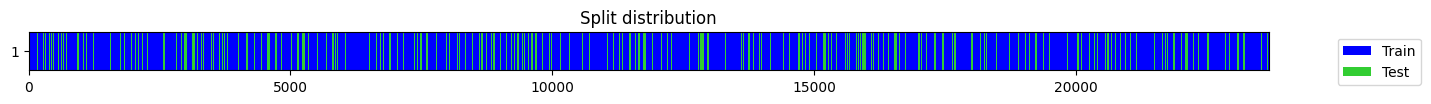

Batch X: torch.Size([64, 46, 48]), Batch Y: torch.Size([64, 3])


In [ ]:
from tsai.all import *

splits = get_splits(y_seq, valid_size=0.2)
tfms = [None, TSRegression()]
dsets = TSDatasets(X_seq, y_seq, tfms=tfms, splits=splits)
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=64)

# Sanity check the output batch
xb, yb = dls.one_batch()
print(f"Batch X: {xb.shape}, Batch Y: {yb.shape}")

In [ ]:
import torch
import torch.nn as nn

class PatchTSTRegressionHead(nn.Module):
    def __init__(self, base_model, embedding_size, output_dim):
        super().__init__()
        self.base = base_model                              # TSai PatchTST model
        self.pooling = nn.AdaptiveAvgPool1d(1)              # [B, C, T] → [B, C, 1]
        self.flatten = nn.Flatten()                         # [B, C, 1] → [B, C]
        self.head = nn.Linear(embedding_size, output_dim)   # [B, C] → [B, out_dim]

    def forward(self, x):
        x = self.base(x)        # [B, C, T]
        print("Base PatchTST output shape:", x.shape)  # <- Add this line
        x = self.pooling(x)     # [B, C, 1]
        x = self.flatten(x)     # [B, C]
        x = self.head(x)        # [B, output_dim]
        return x

In [ ]:
embedding_size = 128  # Should match the c_out used in PatchTST
output_dim = y_seq.shape[1]  # Number of targets (e.g., 3)

model = PatchTSTRegressionHead(
    base_model=base_patchtst,
    embedding_size=46,
    output_dim=3
)

In [ ]:
import torch

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Get one batch
xb, yb = dls.one_batch()

# Move batch to the same device as model
xb = xb.to(device)
yb = yb.to(device)

# Now safely forward pass
out = model(xb)
print("Model output:", out.shape)
print("Target:     ", yb.shape)

Base PatchTST output shape: torch.Size([64, 46, 48])
Model output: torch.Size([64, 3])
Target:      torch.Size([64, 3])


epoch,train_loss,valid_loss,mae,_rmse,time
0,6568.912109,3244.309570,43.148937,56.958839,00:35
1,1457.752686,2026.259521,37.119381,45.013996,00:34
2,1333.165283,1287.165283,26.437269,35.877087,00:35
3,1244.516846,1170.363159,26.347260,34.210571,00:35
4,1204.779419,1241.103760,25.556358,35.229298,00:36
5,1175.143188,1134.715332,26.043316,33.685543,00:36
6,1179.485229,1138.038086,26.291901,33.734821,00:36
7,1162.200073,1125.083984,25.837856,33.542274,00:36
8,1118.279541,1126.912109,25.706751,33.569515,00:36
9,1160.822266,1124.225342,25.621195,33.529472,00:37


Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46

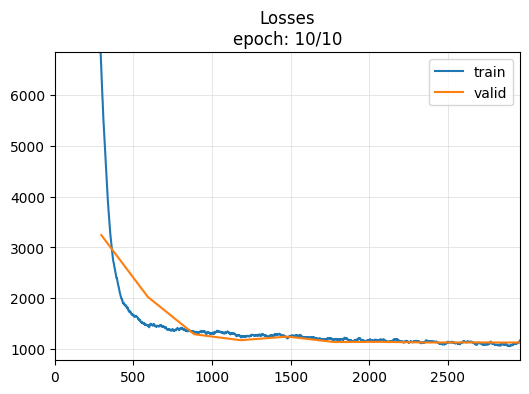

Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46

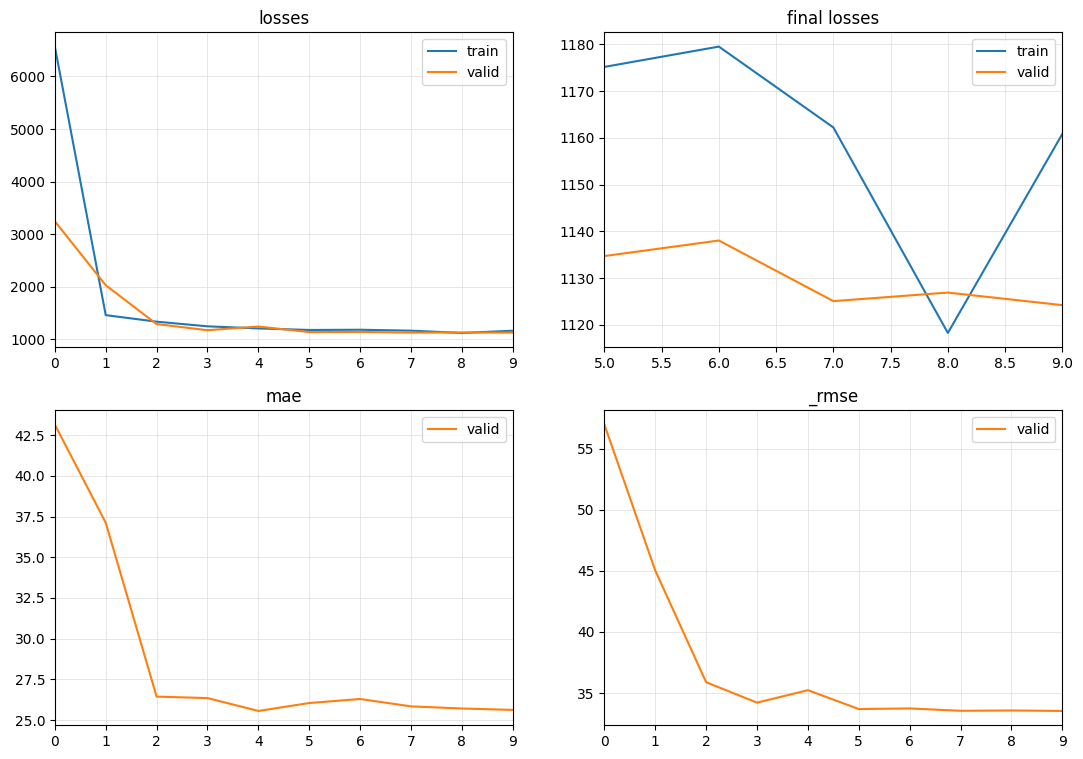

In [ ]:
learn = Learner(
    dls,
    model,
    loss_func=MSELossFlat(),
    metrics=[mae, rmse],
    cbs=ShowGraph()
)
learn.fit_one_cycle(10, lr_max=1e-3)

In [ ]:
# Get predictions and targets on validation set
preds, targets = learn.get_preds(dl=dls.valid)

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

preds = preds.cpu().numpy()
targets = targets.cpu().numpy()

for i, col in enumerate(["predicted_cooling_load_kWh", "optimized_cooling_load_kWh", "actual_cooling_load_kWh"]):
    mae_ = mean_absolute_error(targets[:, i], preds[:, i])
    mse_ = mean_squared_error(targets[:, i], preds[:, i])  # Get MSE
    rmse_ = mse_ ** 0.5                                    # Take sqrt for RMSE
    print(f"{col}: MAE={mae_:.2f}, RMSE={rmse_:.2f}")

Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46

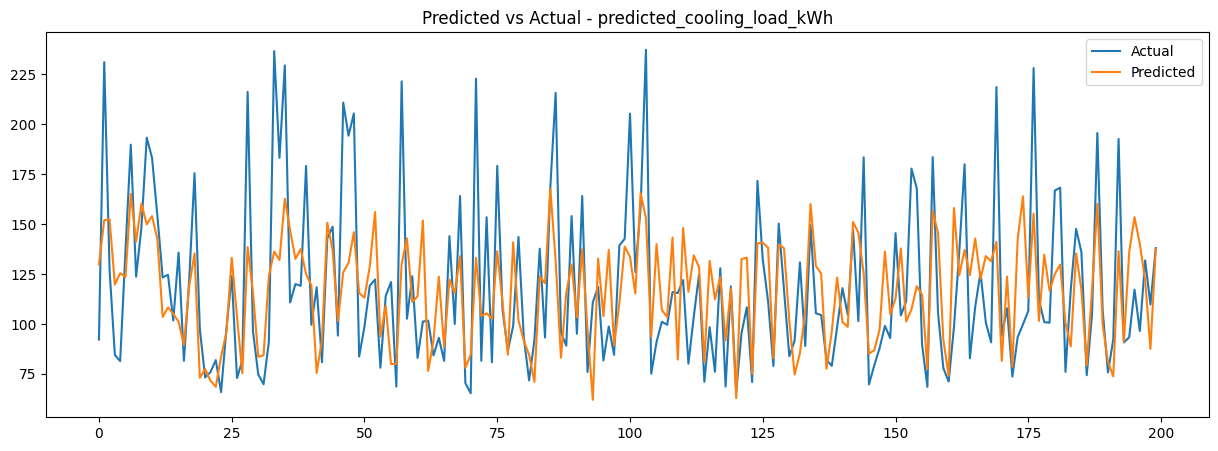

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(targets[:200, 0], label="Actual")
plt.plot(preds[:200, 0], label="Predicted")
plt.title("Predicted vs Actual - predicted_cooling_load_kWh")
plt.legend()
plt.show()

In [ ]:
learn.export('patchtst_occupancy_cooling_model.pkl')

In [ ]:
!pip install huggingface_hub --quiet
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub import HfApi

username = "ritulk"  # Change to your HF username
repo_name = "patchtst-model-based-on-occupancy-weather-data-time-series"  # Choose your repo name

api = HfApi()
# This will create a repo under your account; set private=True if you don't want it public
api.create_repo(repo_id=f"{username}/{repo_name}", private=False, exist_ok=True)
# If repo exists already, exist_ok=True prevents errors

RepoUrl('https://huggingface.co/ritulk/patchtst-model-based-on-occupancy-weather-data-time-series', endpoint='https://huggingface.co', repo_type='model', repo_id='ritulk/patchtst-model-based-on-occupancy-weather-data-time-series')

In [ ]:
from huggingface_hub import upload_file

# Path to your model file
local_model_path = "patchtst_occupancy_cooling_model.pkl"

# Upload the file to your hub repo under the "main" branch
upload_file(
    path_or_fileobj=local_model_path,
    path_in_repo=local_model_path,  # Keep same filename on hub
    repo_id=f"{username}/{repo_name}",
    repo_type="model",
    commit_message="Upload PatchTST model fine-tuned on occupancy+weather data via TSai.",
    token=True  # Uses your logged-in token
)

patchtst_occupancy_cooling_model.pkl:   0%|          | 0.00/8.34M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/ritulk/patchtst-model-based-on-occupancy-weather-data-time-series/commit/46b16ea1540e836da67fa291d9b7c9ee1cb9ac97', commit_message='Upload PatchTST model fine-tuned on occupancy+weather data via TSai.', commit_description='', oid='46b16ea1540e836da67fa291d9b7c9ee1cb9ac97', pr_url=None, repo_url=RepoUrl('https://huggingface.co/ritulk/patchtst-model-based-on-occupancy-weather-data-time-series', endpoint='https://huggingface.co', repo_type='model', repo_id='ritulk/patchtst-model-based-on-occupancy-weather-data-time-series'), pr_revision=None, pr_num=None)

In [ ]:
preds, targets = learn.get_preds(dl=dls.valid)

Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46, 48])
Base PatchTST output shape: torch.Size([64, 46

In [ ]:
import pandas as pd

# Convert Tensors to NumPy arrays
preds = preds.cpu().numpy()
targets = targets.cpu().numpy()

# DataFrames for easier handling and labeling
df_preds = pd.DataFrame(
    preds,
    columns=['predicted_cooling_load_kWh_pred', 'optimized_cooling_load_kWh_pred', 'actual_cooling_load_kWh_pred']
)
df_targets = pd.DataFrame(
    targets,
    columns=['predicted_cooling_load_kWh_true', 'optimized_cooling_load_kWh_true', 'actual_cooling_load_kWh_true']
)

# Concatenate predictions and true values
df_results = pd.concat([df_preds, df_targets], axis=1)

# Save to CSV (optional)
df_results.to_csv("validation_predictions_vs_actuals.csv", index=False)

# View first few rows
print(df_results.head())

   predicted_cooling_load_kWh_pred  optimized_cooling_load_kWh_pred  \
0                       129.814896                       129.192062   
1                       151.963684                       152.593414   
2                       152.357956                       155.323593   
3                       119.741104                       122.118027   
4                       125.401627                       124.948570   

   actual_cooling_load_kWh_pred  predicted_cooling_load_kWh_true  \
0                    128.702988                        92.220001   
1                    157.095871                       231.039993   
2                    156.971909                       127.209999   
3                    117.161079                        84.430000   
4                    126.538300                        81.410004   

   optimized_cooling_load_kWh_true  actual_cooling_load_kWh_true  
0                        94.150002                     93.239998  
1                       246.63

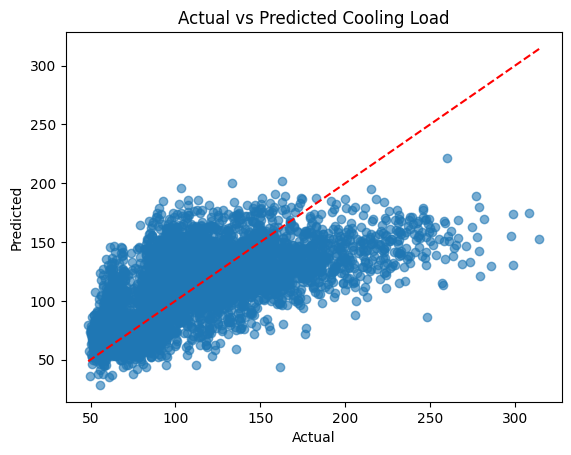

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_results['actual_cooling_load_kWh_true'], df_results['actual_cooling_load_kWh_pred'], alpha=0.6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Cooling Load')
plt.plot([df_results['actual_cooling_load_kWh_true'].min(), df_results['actual_cooling_load_kWh_true'].max()],
         [df_results['actual_cooling_load_kWh_true'].min(), df_results['actual_cooling_load_kWh_true'].max()],
         'r--')
plt.show()

In [ ]:
# Before training, run this:
xb, yb = dls.one_batch()
out = model(xb)
print("Model output shape:", out.shape)
print("Target batch shape:", yb.shape)  # Should both be [64, 3]

Model output shape: torch.Size([64, 46, 48])
Target batch shape: torch.Size([64, 3])


In [ ]:
xb, yb = dls.one_batch()
print("Input batch shape:", xb.shape)
out = model(xb)
print("Model output shape:", out.shape)
print("Target batch shape:", yb.shape)

Input batch shape: torch.Size([64, 46, 48])
Model output shape: torch.Size([64, 46, 48])
Target batch shape: torch.Size([64, 3])


In [ ]:
print(type(X_seq), type(X_seq[0]), type(X_seq[0][0]))
print(X_seq[0].shape)  # Should be (n_features, context_window)
print(y_seq[0].shape)  # Should be (3,)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(46, 48)
(3,)


# Inference

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Load CSV
df = pd.read_csv("hvac_with_weather.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], dayfirst=True)
df = df.sort_values("timestamp").reset_index(drop=True)
df.set_index("timestamp", inplace=True)

# Label encoding for categoricals
categorical_cols = [
    "zone_id", "zone_type", "zone_function", "weather_condition",
    "zone_orientation", "solar_presence", "is_weekend",
    "occupancy_level", "zoning_mode", "merge_key_weather"
]
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])

targets = ["predicted_cooling_load_kWh", "optimized_cooling_load_kWh", "actual_cooling_load_kWh"]
input_features = [col for col in df.columns if col not in targets]
df = df.dropna(subset=targets)

scaler = StandardScaler()
df[input_features] = scaler.fit_transform(df[input_features])


In [2]:
context_window = 48
forecast_horizon = 1

X = df[input_features].values.astype(np.float32)
y = df[targets].values.astype(np.float32)
X_seq, y_seq = [], []

for i in range(len(df) - context_window - forecast_horizon):
    x_window = X[i : i + context_window].T
    y_window = y[i + context_window]
    X_seq.append(x_window)
    y_seq.append(y_window)

X_seq = np.stack(X_seq)
y_seq = np.stack(y_seq)
print(f"X_seq: {X_seq.shape}, y_seq: {y_seq.shape}")

# Split (80% train, 20% valid)
split_idx = int(0.8 * len(X_seq))
X_train, X_valid = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_valid = y_seq[:split_idx], y_seq[split_idx:]


X_seq: (23684, 46, 48), y_seq: (23684, 3)


In [6]:
import torch.nn as nn

class PatchTSTRegressionHead(nn.Module):
    def __init__(self, base_model, embedding_size, output_dim):
        super().__init__()
        self.base = base_model                              # TSai PatchTST model
        self.pooling = nn.AdaptiveAvgPool1d(1)              # [B, C, T] → [B, C, 1]
        self.flatten = nn.Flatten()                         # [B, C, 1] → [B, C]
        self.head = nn.Linear(embedding_size, output_dim)   # [B, C] → [B, out_dim]

    def forward(self, x):
        x = self.base(x)        # [B, C, T]
        x = self.pooling(x)     # [B, C, 1]
        x = self.flatten(x)     # [B, C]
        x = self.head(x)        # [B, output_dim]
        return x


In [10]:
from tsai.all import *
learn_inf = load_learner('patchtst_occupancy_cooling_model.pkl')


In [15]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays (X_valid and y_valid) to torch tensors
X_valid_tensor = torch.tensor(X_valid)
y_valid_tensor = torch.tensor(y_valid)

# Create TensorDataset and DataLoader
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
dl_valid = DataLoader(valid_dataset, batch_size=64, shuffle=False)

# Now get predictions with your model learner
preds, targets = learn_inf.get_preds(dl=dl_valid)
preds = preds.cpu().numpy()
targets = targets.cpu().numpy()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

target_names = ["predicted_cooling_load_kWh", "optimized_cooling_load_kWh", "actual_cooling_load_kWh"]

for i, col in enumerate(target_names):
    mae_ = mean_absolute_error(targets[:, i], preds[:, i])
    mse_ = mean_squared_error(targets[:, i], preds[:, i])
    rmse_ = mse_ ** 0.5
    r2_ = r2_score(targets[:, i], preds[:, i])
    corr_ = np.corrcoef(targets[:, i], preds[:, i])[0, 1]
    print(f"{col}: MAE={mae_:.2f}, RMSE={rmse_:.2f}, R2={r2_:.3f}, Pearson r={corr_:.3f}")

# Store predictions in DataFrame
df_preds = pd.DataFrame(
    preds, columns=['predicted_cooling_load_kWh_pred', 'optimized_cooling_load_kWh_pred', 'actual_cooling_load_kWh_pred']
)
df_targets = pd.DataFrame(
    targets, columns=['predicted_cooling_load_kWh_true', 'optimized_cooling_load_kWh_true', 'actual_cooling_load_kWh_true']
)
df_results = pd.concat([df_preds, df_targets], axis=1)
df_results.to_csv("validation_predictions_vs_actuals.csv", index=False)
print(df_results.head())


predicted_cooling_load_kWh: MAE=24.32, RMSE=31.62, R2=0.371, Pearson r=0.609
optimized_cooling_load_kWh: MAE=25.91, RMSE=33.98, R2=0.454, Pearson r=0.673
actual_cooling_load_kWh: MAE=26.30, RMSE=34.31, R2=0.448, Pearson r=0.669
   predicted_cooling_load_kWh_pred  optimized_cooling_load_kWh_pred  \
0                       120.763611                       119.818855   
1                       120.618210                       117.757202   
2                       119.202827                       124.707390   
3                       117.978371                       115.294563   
4                       127.479431                       123.485374   

   actual_cooling_load_kWh_pred  predicted_cooling_load_kWh_true  \
0                    118.028854                        81.709999   
1                    118.114799                        94.059998   
2                    118.806145                       153.500000   
3                    112.092087                       116.250000   
4    

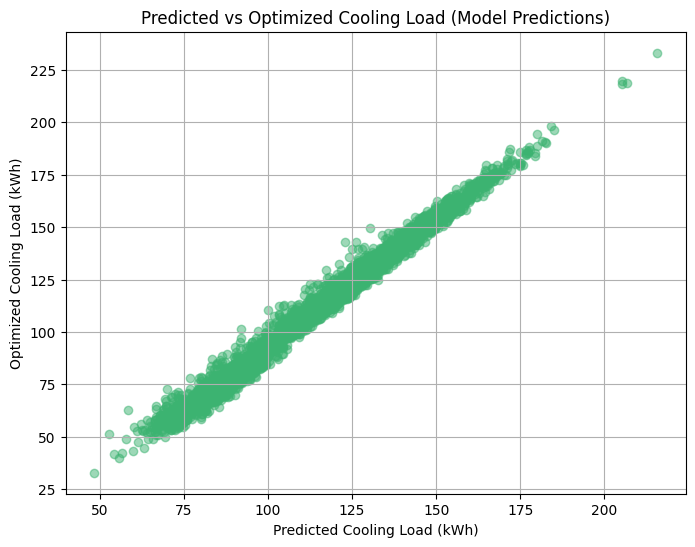

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(
    df_results['predicted_cooling_load_kWh_pred'],
    df_results['optimized_cooling_load_kWh_pred'],
    alpha=0.5,
    c='mediumseagreen'
)
plt.xlabel('Predicted Cooling Load (kWh)')
plt.ylabel('Optimized Cooling Load (kWh)')
plt.title('Predicted vs Optimized Cooling Load (Model Predictions)')
plt.grid(True)
plt.show()
